# Lifelines testing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import os

In [3]:
os.chdir(u'C:/Users/kesj/code/lifelines/')

In [4]:
import lifelines as ll

## import some intrinsic data

In [5]:
data = ll.datasets.load_dd()
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [6]:
#kmf = ll.KaplanMeierFitter()

In [7]:
#T = data['duration']
#C = data['observed']

In [8]:
#kmf.fit(T,event_observed=C)

In [9]:
#kmf.survival_function_.plot()
#plt.title('Survival function of political regimes');

In [10]:
#kmf.plot()

## Cox PH model

In [11]:
rossi_dataset = ll.datasets.load_rossi()
cf = ll.CoxPHFitter()

In [12]:
cf.fit(rossi_dataset,'week',event_col='arrest')

lifelines\fitters\coxph_fitter.py:286: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df.sort(duration_col, inplace=True)


<lifelines.CoxPHFitter: fitted with 432 observations, 318 censored>

In [13]:
cf.print_summary()

n=432, number of events=114

           coef  exp(coef)  se(coef)          z         p  lower 0.95  upper 0.95    
fin  -1.897e-01  8.272e-01 9.579e-02 -1.981e+00 4.763e-02  -3.775e-01  -1.938e-03   *
age  -3.500e-01  7.047e-01 1.344e-01 -2.604e+00 9.210e-03  -6.134e-01  -8.651e-02  **
race  1.032e-01  1.109e+00 1.012e-01  1.020e+00 3.078e-01  -9.516e-02   3.015e-01    
wexp -7.486e-02  9.279e-01 1.051e-01 -7.124e-01 4.762e-01  -2.809e-01   1.311e-01    
mar  -1.421e-01  8.675e-01 1.254e-01 -1.134e+00 2.570e-01  -3.880e-01   1.037e-01    
paro -4.134e-02  9.595e-01 9.522e-02 -4.341e-01 6.642e-01  -2.280e-01   1.453e-01    
prio  2.639e-01  1.302e+00 8.291e-02  3.182e+00 1.460e-03   1.013e-01   4.264e-01  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.640


In [14]:
rossi_dataset.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [15]:
rossi_dataset.shape

(432, 9)

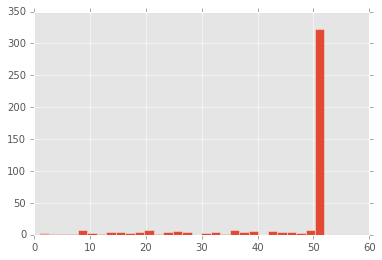

In [16]:
rossi_dataset.week.hist(bins=30)

In [17]:
pred = cf.predict_survival_function(rossi_dataset)
#pred.plot()

In [18]:
pred.shape

(50, 432)

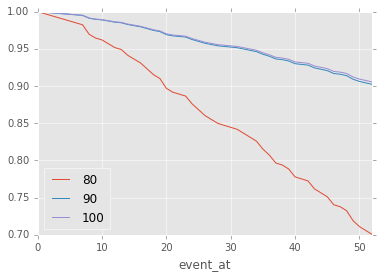

In [19]:
pred.iloc[:,[80,90,100]].plot()


In [20]:
partial_hazard = cf.predict_partial_hazard(rossi_dataset)
partial_hazard.shape

(432, 1)

In [21]:
partial_hazard_ci = cf.predict_partial_hazard_ci(rossi_dataset)
partial_hazard_ci.shape

(432, 2)

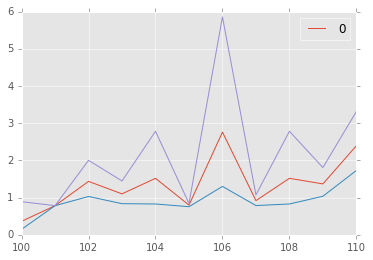

In [22]:
partial_hazard.ix[100:110].plot()
partial_hazard_ci.lowerbound.ix[100:110].plot()
partial_hazard_ci.upperbound.ix[100:110].plot()


In [23]:

#plt.scatter(partial_hazard_ci.min(axis=1),partial_hazard_ci.lowerbound)

In [24]:
cf.identify_forecast_timepoints(rossi_dataset,[0,4,8,12])

,time_point_0,time_point_4,time_point_8,time_point_12
0,20,24,28,32
1,17,21,25,29
2,25,29,33,37
3,52,56,60,64
4,52,56,60,64
5,52,56,60,64
6,23,27,31,35
7,52,56,60,64
8,52,56,60,64
9,52,56,60,64


In [25]:
rossi_dataset.tail()

,week,arrest,fin,age,race,wexp,mar,paro,prio
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3
431,52,0,1,24,1,1,0,1,1


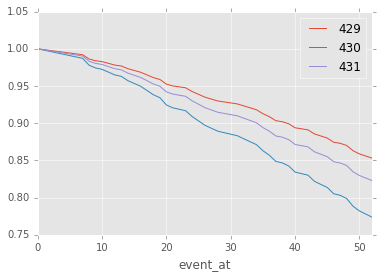

In [26]:
pred.iloc[:,429:].plot()

In [27]:
cf.baseline_hazard_

,baseline hazard
event_at,
0,0.000000
1,0.001960
2,0.001965
3,0.001967
4,0.001971
5,0.001977
6,0.001985
7,0.001996
8,0.009998


In [28]:
cf.baseline_hazard_.index.max()

52.0

In [29]:
obs_index = rossi_dataset.index.tolist()
len(obs_index)

432

In [30]:
Xt = rossi_dataset.values
np.shape(Xt)

(432L, 9L)

In [31]:
rossi_dataset.columns

Index([u'week', u'arrest', u'fin', u'age', u'race', u'wexp', u'mar', u'paro',
       u'prio'],
      dtype='object')

In [32]:
cf.data.columns

Index([u'fin', u'age', u'race', u'wexp', u'mar', u'paro', u'prio'], dtype='object')

In [33]:
my_index = rossi_dataset.index.tolist()
len(my_index)

432

In [34]:
#cf.predict_partial_hazard(rossi_dataset)

In [35]:
#ind_hazards = cf.predict_partial_hazard(cf.data).values
#ind_hazards

In [36]:
#event_table = ll.utils.survival_table_from_events(cf.durations.values,cf.event_observed.values)
#event_table

In [37]:
cf.summary

,coef,exp(coef),se(coef),z,p,lower 0.95,upper 0.95
fin,-0.189731,0.827182,0.095793,-1.980629,0.047633,-0.377523,-0.001938
age,-0.349966,0.704712,0.134387,-2.604155,0.009210,-0.613418,-0.086513
race,0.103178,1.108688,0.101171,1.019839,0.307805,-0.095157,0.301512
wexp,-0.074862,0.927872,0.105086,-0.712386,0.476226,-0.280872,0.131148
mar,-0.142150,0.867491,0.125403,-1.133541,0.256987,-0.387990,0.103690
paro,-0.041338,0.959505,0.095217,-0.434144,0.664184,-0.228001,0.145325
prio,0.263865,1.301953,0.082913,3.182426,0.001460,0.101323,0.426408


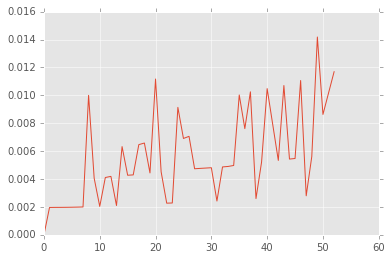

In [38]:
plt.plot(cf.baseline_hazard_)

In [39]:
tcol = cf.durations.name
print(tcol)
for idx in my_index:
    my_times = np.array([rossi_dataset.loc[idx, tcol]+tp for tp in [0,4,8,12]])

week


In [40]:
#my_index

In [41]:
#cf.return_desired_cumulative_hazards(4)

In [42]:
cf.durations.name

'week'

In [43]:
rossi_dataset.index.T

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            422, 423, 424, 425, 426, 427, 428, 429, 430, 431],
           dtype='int64', length=432)

In [44]:
#partial_hazard.ix[:10].plot()
#pp2.lowerbound.ix[:10].plot(color='forestgreen')
#pp2.upperbound.ix[:10].plot()

In [49]:
surv_pred = cf.forecast_survival_function(rossi_dataset,[0,4,8,12])

In [53]:
surv_pred['surv'].sum()/float(len(rossi_dataset))

t_0     0.777892
t_4     0.771285
t_8     0.765317
t_12    0.759676
dtype: float64

In [46]:
surv_pred2

<class 'pandas.core.panel.Panel'>
Dimensions: 1 (items) x 432 (major_axis) x 4 (minor_axis)
Items axis: surv to surv
Major_axis axis: 0 to 431
Minor_axis axis: t_0 to t_12

In [47]:
surv_pred2.minor_axis = ['a1','a2','a3','a4']
surv_pred2['surv']

,a1,a2,a3,a4
0,0.902765,0.882939,0.858023,0.845455
1,0.819877,0.752315,0.704038,0.662332
2,0.720217,0.680236,0.650985,0.589636
3,0.874582,0.874582,0.874582,0.874582
4,0.717092,0.717092,0.717092,0.717092
5,0.711863,0.711863,0.711863,0.711863
6,0.947494,0.932306,0.925839,0.912627
7,0.737526,0.737526,0.737526,0.737526
8,0.528254,0.528254,0.528254,0.528254
9,0.700375,0.700375,0.700375,0.700375


In [48]:
surv_pred['lbci'].columns = ['a1','a2','a3','a4','t_0','t_1','t_2','t_3']
surv_pred['lbci'].head()

NameError: name 'surv_pred' is not defined

In [ ]:
tdp = cf.identify_forecast_timepoints(rossi_dataset,[0,4,8,12])

In [ ]:
maxTime = cf.baseline_hazard_.index.max()
maxTime

In [ ]:
tdp[tdp>maxTime] = maxTime

In [ ]:
tdp

In [ ]:
spec_cum_haz = tdp.applymap(lambda x: cf._return_desired_cumulative_hazards(x))

In [ ]:
spec_cum_haz

In [ ]:
tdp

In [ ]:
surv_pred['surv'].ix[0].plot()
surv_pred['lbci'].ix[0].plot()

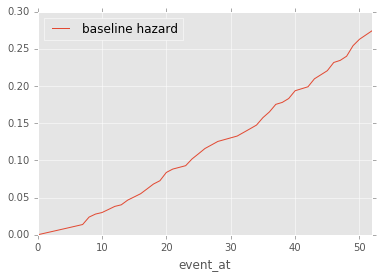

In [56]:
cf.baseline_cumulative_hazard_.plot()

### Look at fitting/extrapolating from baseline hazard

In [57]:
def line(x,a,b):
    return a*x + b

from scipy.optimize import curve_fit

In [61]:
popt,pcov = curve_fit(line, cf.baseline_cumulative_hazard_.index, cf.baseline_cumulative_hazard_.values.ravel())

In [109]:
popt2,pcov2 = curve_fit(line, cf.baseline_cumulative_hazard_.index[4:], cf.baseline_cumulative_hazard_.values.ravel()[4:])
popt2

array([ 0.00551296, -0.02804417])

In [62]:
popt

array([ 0.00532471, -0.02149399])

In [63]:
pcov

array([[  6.40108860e-09,  -1.60923369e-07],
       [ -1.60923369e-07,   5.51863461e-06]])

### `pcov` will contain the true variance and covariance of the parameters, so the best-fit parameters are 

In [67]:
print "a =", popt[0], "+/-", pcov[0,0]**0.5
print "b =", popt[1], "+/-", pcov[1,1]**0.5

a = 0.00532470618549 +/- 8.00068034593e-05
b = -0.0214939882775 +/- 0.00234917743191


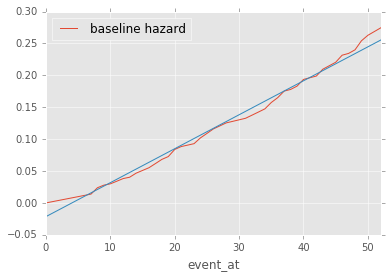

In [78]:
cf.baseline_cumulative_hazard_.plot()
x = np.arange(0,53)
plt.plot(x,line(x,popt[0],popt[1]))#,lw='2',color='midnightblue')

In [92]:
import seaborn as sns

In [90]:
xvals = np.array(cf.baseline_cumulative_hazard_.index.tolist())


array([ -2.14939883e-02,  -1.61692821e-02,  -1.08445759e-02,
        -5.51986972e-03,  -1.95163536e-04,   5.12954265e-03,
         1.04542488e-02,   1.57789550e-02,   2.11036612e-02,
         2.64283674e-02,   3.17530736e-02,   3.70777798e-02,
         4.24024859e-02,   4.77271921e-02,   5.30518983e-02,
         5.83766045e-02,   6.37013107e-02,   6.90260169e-02,
         7.43507231e-02,   7.96754292e-02,   8.50001354e-02,
         9.03248416e-02,   9.56495478e-02,   1.00974254e-01,
         1.06298960e-01,   1.11623666e-01,   1.16948373e-01,
         1.22273079e-01,   1.27597785e-01,   1.38247197e-01,
         1.43571903e-01,   1.48896610e-01,   1.54221316e-01,
         1.59546022e-01,   1.64870728e-01,   1.70195434e-01,
         1.75520141e-01,   1.80844847e-01,   1.86169553e-01,
         1.91494259e-01,   2.02143672e-01,   2.07468378e-01,
         2.12793084e-01,   2.18117790e-01,   2.23442496e-01,
         2.28767202e-01,   2.34091909e-01,   2.39416615e-01,
         2.44741321e-01,

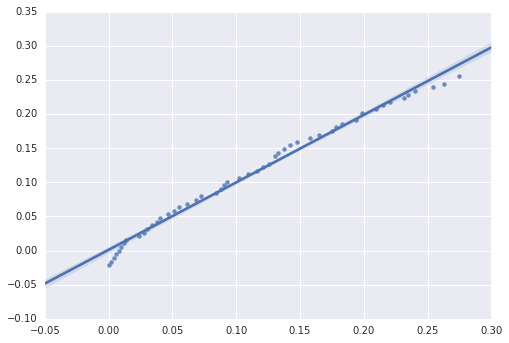

In [96]:
sns.regplot(cf.baseline_cumulative_hazard_.values.ravel(),line(xvals,popt[0],popt[1]))

#(xvals,line(xvals,popt[0],popt[1]))

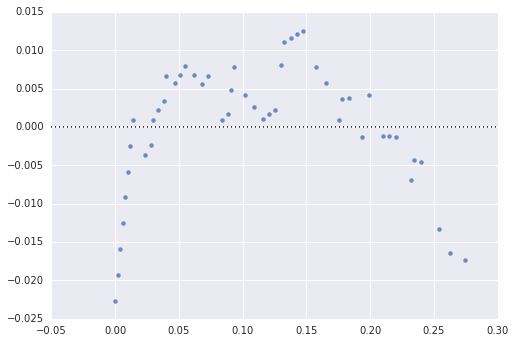

In [97]:
sns.residplot(cf.baseline_cumulative_hazard_.values.ravel(),line(xvals,popt[0],popt[1]))

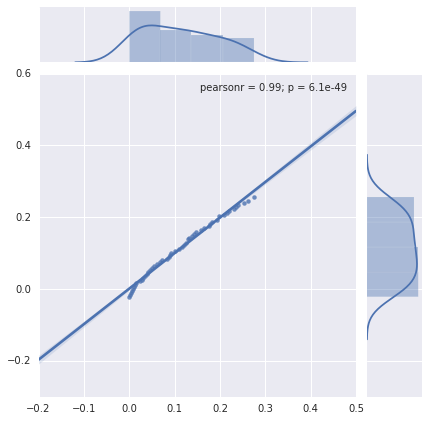

In [99]:
#sns.jointplot(x1, x2, kind="kde", size=7, space=0)
sns.jointplot(cf.baseline_cumulative_hazard_.values.ravel(),line(xvals,popt[0],popt[1]),kind='reg')

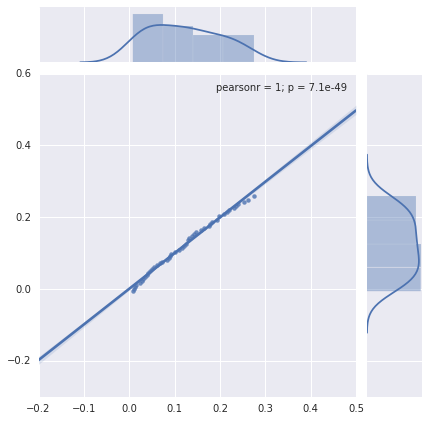

In [110]:
#sns.jointplot(x1, x2, kind="kde", size=7, space=0)
sns.jointplot(cf.baseline_cumulative_hazard_.values.ravel()[4:],line(xvals[4:],popt2[0],popt2[1]),kind='reg')

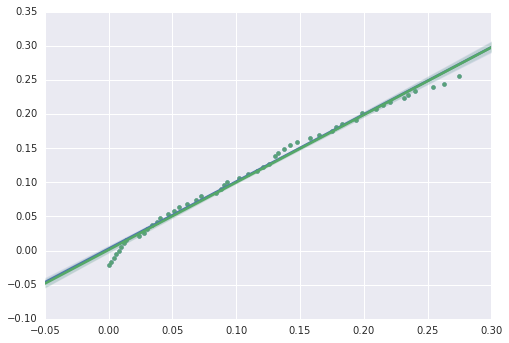

In [107]:
sns.regplot(cf.baseline_cumulative_hazard_.values.ravel(),line(xvals,popt[0],popt[1]),robust=True)
#sns.regplot(cf.baseline_cumulative_hazard_.values.ravel()[4:],line(xvals,popt[0],popt[1])[4:])

In [102]:
extra_x = np.array([52 + a for a in [0,4,8,12]])
extra_x

array([52, 56, 60, 64])

In [103]:
line(extra_x,popt[0],popt[1])

array([ 0.25539073,  0.27668956,  0.29798838,  0.31928721])

(0, 64)

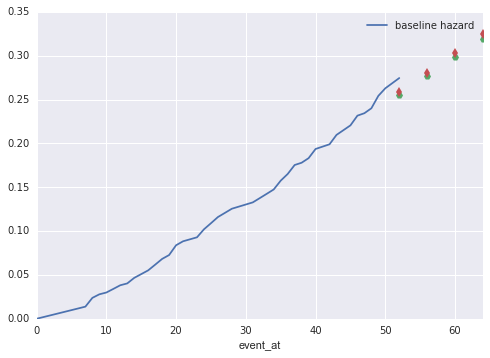

In [111]:
cf.baseline_cumulative_hazard_.plot()
plt.plot(extra_x,line(extra_x,popt[0],popt[1]),'H')
plt.plot(extra_x,line(extra_x,popt2[0],popt2[1]),'d')

plt.xlim([0,64])

In [91]:

residuals = cf.baseline_cumulative_hazard_.values.ravel() - line(xvals,popt[0],popt[1])
fres = sum(residuals**2)
print(fres)

0.00353525058585


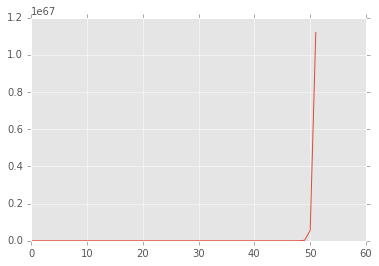

In [71]:
plt.plot(x,4*np.exp(3.*x))

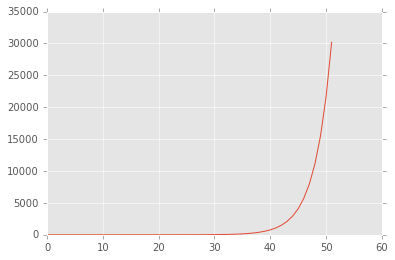

In [76]:
plt.plot(np.exp(x/3.)/800.)

In [77]:
def exponetial(x,p1,p2,p3):
    return(p1+p2*np.exp(p3*x))

In [79]:
epopt,epcov = curve_fit(exponetial, cf.baseline_cumulative_hazard_.index, cf.baseline_cumulative_hazard_.values.ravel())

In [80]:
epopt

array([  3.37573617e-02,   2.82261469e-15,   1.00000000e+00])

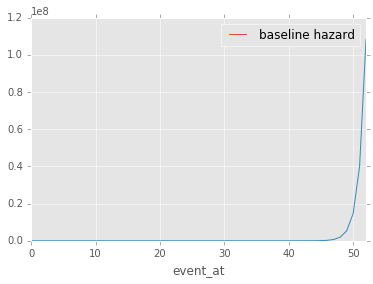

In [82]:
cf.baseline_cumulative_hazard_.plot()
plt.plot(x,exponetial(x,epopt[0],epopt[1],1.))


In [112]:
from scipy.interpolate import interp1d

In [114]:
cf.durations.name

'week'

In [115]:
def identify_forecast_timepoints(X, time_range):
    """
        :param X: a (n,d) covariate numpy array or DataFrame. If a numpy array, it is coerced into a DataFrame
        :param time_range: a list of times to calculate the survival for.
        :return: time_point_df a DataFrame of selected future times to create survival forecasts for.

        Construct a data frame that has the current time_col for each observation incremented by the values in the
        desired list (time_range)
    """
    time_col = 'week'
    column_names = ['time_point_'+np.str(tp) for tp in time_range]
    
    if isinstance(X, pd.DataFrame):
        my_index = X.index.tolist()
    else:
        my_index = np.arange(0, len(X))
        X = pd.DataFrame(X, columns=self.hazards_.columns)

    time_point_df = pd.DataFrame(columns=column_names, index=my_index)
    for idx in my_index:
        my_times = np.array([X.loc[idx, time_col]+tp for tp in time_range])
        time_point_df.ix[idx] = my_times

    return time_point_df

In [116]:
tdp = identify_forecast_timepoints(rossi_dataset,[0,4,8,12])

In [125]:
tdp.head()

,time_point_0,time_point_4,time_point_8,time_point_12
0,20,24,28,32
1,17,21,25,29
2,25,29,33,37
3,52,56,60,64
4,52,56,60,64


In [136]:
line(extra_x,popt[0],popt[1]), cf.baseline_cumulative_hazard_.ix[52].values[0]

(array([ 0.25539073,  0.27668956,  0.29798838,  0.31928721]),
 0.27452802672099785)

In [144]:
cf.baseline_cumulative_hazard_.index[-1]

52.0

In [145]:
offset =  cf.baseline_cumulative_hazard_.ix[52].values[0] -line(cf.baseline_cumulative_hazard_.index[-1],popt[0],popt[1])

In [147]:
offset+line(extra_x,popt[0],popt[1]), cf.baseline_cumulative_hazard_.ix[52].values[0] 

(array([ 0.27452803,  0.29582685,  0.31712568,  0.3384245 ]),
 0.27452802672099785)

In [148]:
offset+line(53,popt[0],popt[1])

0.27985273290648938

In [166]:
cf.baseline_cumulative_hazard_.values[-1]

array([ 0.27452803])

In [167]:
from scipy import interpolate
from scipy.optimize import curve_fit

def line(x,a,b):
    return a*x + b

def linear_baseline_fit(mdl,line):
    phaz,phazcov = curve_fit(line, mdl.baseline_cumulative_hazard_.index, mdl.baseline_cumulative_hazard_.values.ravel())
    return phaz,phazcov

phaz, phazcov = linear_baseline_fit(cf,line)


offset = cf.baseline_cumulative_hazard_.values[-1][0] - line(cf.baseline_cumulative_hazard_.index[-1],phaz[0],phaz[1])

def return_desired_cumulative_hazards(mdl,t):
    """
        t: an event time that is used as the base line to forecast forward in time
    """
    
    maxtimepoint = mdl.baseline_hazard_.index.max() #Now taken care of in the forecast
    if t > maxtimepoint:
        #if extrapolate is None:
        t = maxtimepoint # just set to the max value.
 
        
    try:
            # spec_hazard = self.baseline_hazard_.ix[t].values
        c_haz = mdl.baseline_cumulative_hazard_.ix[t].values[0]

    except KeyError:
        # get the first after this point
        t_post = mdl.baseline_hazard_.ix[t:].index[0]
        # get the last before this point
        t_prior = mdl.baseline_hazard_.ix[:t].index[-1]            # x = [t_prior, t_post]
        #
        y = [mdl.baseline_cumulative_hazard_.ix[t_prior].values[0],
                 mdl.baseline_cumulative_hazard_.ix[t_post].values[0]]
        print(t,y)
        chaz_interp = interpolate.interp1d([t_prior, t_post], y)
        c_haz = chaz_interp(t)
    #except IndexError:
        

    return c_haz

In [168]:
line(52,popt[0],popt[1])+offset

0.27452802672099785

In [169]:
tdp.applymap(lambda x: return_desired_cumulative_hazards(cf,x) if x < cf.baseline_hazard_.index.max() else offset+line(x,popt[0],popt[1]))

(29L, [0.12549086652342845, 0.13029912823891177])
(41L, [0.19362895495950963, 0.19896088704932005])
(29L, [0.12549086652342845, 0.13029912823891177])
(41L, [0.19362895495950963, 0.19896088704932005])
(29L, [0.12549086652342845, 0.13029912823891177])
(41L, [0.19362895495950963, 0.19896088704932005])
(51L, [0.26283728329113454, 0.27452802672099785])
(41L, [0.19362895495950963, 0.19896088704932005])
(51L, [0.26283728329113454, 0.27452802672099785])
(29L, [0.12549086652342845, 0.13029912823891177])
(41L, [0.19362895495950963, 0.19896088704932005])
(51L, [0.26283728329113454, 0.27452802672099785])
(29L, [0.12549086652342845, 0.13029912823891177])
(51L, [0.26283728329113454, 0.27452802672099785])
(41L, [0.19362895495950963, 0.19896088704932005])
(51L, [0.26283728329113454, 0.27452802672099785])
(29L, [0.12549086652342845, 0.13029912823891177])
(29L, [0.12549086652342845, 0.13029912823891177])
(29L, [0.12549086652342845, 0.13029912823891177])
(51L, [0.26283728329113454, 0.27452802672099785])


,time_point_0,time_point_4,time_point_8,time_point_12
0,0.083833,0.102032,0.125491,0.137584
1,0.061652,0.088349,0.108938,0.127895
2,0.108938,0.127895,0.142484,0.175338
3,0.274528,0.295827,0.317126,0.338425
4,0.274528,0.295827,0.317126,0.338425
5,0.274528,0.295827,0.317126,0.338425
6,0.092898,0.120730,0.132720,0.157477
7,0.274528,0.295827,0.317126,0.338425
8,0.274528,0.295827,0.317126,0.338425
9,0.274528,0.295827,0.317126,0.338425


In [170]:
t2 = tdp.applymap(lambda x: return_desired_cumulative_hazards(cf,x) ) if x <= cf.baseline_hazard_.index.max() else offset+line(x,popt[0],popt[1]))

(29L, [0.12549086652342845, 0.13029912823891177])
(41L, [0.19362895495950963, 0.19896088704932005])
(29L, [0.12549086652342845, 0.13029912823891177])
(41L, [0.19362895495950963, 0.19896088704932005])
(29L, [0.12549086652342845, 0.13029912823891177])
(41L, [0.19362895495950963, 0.19896088704932005])
(51L, [0.26283728329113454, 0.27452802672099785])
(41L, [0.19362895495950963, 0.19896088704932005])
(51L, [0.26283728329113454, 0.27452802672099785])
(29L, [0.12549086652342845, 0.13029912823891177])
(41L, [0.19362895495950963, 0.19896088704932005])
(51L, [0.26283728329113454, 0.27452802672099785])
(29L, [0.12549086652342845, 0.13029912823891177])
(51L, [0.26283728329113454, 0.27452802672099785])
(41L, [0.19362895495950963, 0.19896088704932005])
(51L, [0.26283728329113454, 0.27452802672099785])
(29L, [0.12549086652342845, 0.13029912823891177])
(29L, [0.12549086652342845, 0.13029912823891177])
(29L, [0.12549086652342845, 0.13029912823891177])
(51L, [0.26283728329113454, 0.27452802672099785])


In [171]:
t2

,time_point_0,time_point_4,time_point_8,time_point_12
0,0.083833,0.102032,0.125491,0.137584
1,0.061652,0.088349,0.108938,0.127895
2,0.108938,0.127895,0.142484,0.175338
3,0.274528,0.274528,0.274528,0.274528
4,0.274528,0.274528,0.274528,0.274528
5,0.274528,0.274528,0.274528,0.274528
6,0.092898,0.120730,0.132720,0.157477
7,0.274528,0.274528,0.274528,0.274528
8,0.274528,0.274528,0.274528,0.274528
9,0.274528,0.274528,0.274528,0.274528
